In [ ]:
!pip install openpyxl

In [ ]:
!wget https://archive.ics.uci.edu/static/public/352/online+retail.zip

--2025-10-23 19:17:34--  https://archive.ics.uci.edu/static/public/352/online+retail.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘online+retail.zip’

online+retail.zip       [    <=>             ]  22.62M  32.8MB/s    in 0.7s    

2025-10-23 19:17:35 (32.8 MB/s) - ‘online+retail.zip’ saved [23715478]



In [ ]:
!unzip online+retail.zip

Archive:  online+retail.zip
 extracting: Online Retail.xlsx      


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
df1 = pd.read_excel("Online Retail.xlsx", dtype={'InvoiceNo': 'string', 'StockCode': 'string', 'Description': 'string', 'Country': 'string'})
df1.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [ ]:
df1.shape

(541909, 8)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  string        
 1   StockCode    541909 non-null  string        
 2   Description  540455 non-null  string        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  string        
dtypes: datetime64[ns](1), float64(2), int64(1), string(4)
memory usage: 33.1 MB


In [ ]:
df1.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
df1[df1.Description.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,<NA>,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,<NA>,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,<NA>,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,<NA>,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,<NA>,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,<NA>,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [ ]:
df1[df1.StockCode=="22139"].Description.mode()

,Description
0,RETROSPOT TEA SET CERAMIC 11 PC


In [ ]:
most_freq = df1[["StockCode", "Description"]].value_counts().reset_index()
most_freq

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4787,21491,SET OF THREE VINTAGE GIFT WRAPS,1
4788,84876D,damaged,1
4789,20827,damages,1
4790,20832,check,1


In [ ]:
most_freq[most_freq.StockCode=="85123A"].head(1)

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302


In [ ]:
most_freq.groupby("StockCode").head(1)

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4755,37503,TEA TIME CAKE STAND IN GIFT BOX,1
4773,37461,FUNKY MONKEY MUG,1
4775,37474,SET/4 2 TONE EGG SHAPE MIXING BOWLS,1
4782,22145,CHRISTMAS CRAFT HEART STOCKING,1


In [ ]:
most_freq.columns = ["StockCode", "freq_description", "count"]
df2 = df1.merge(most_freq, on="StockCode", how="left")
df2.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_description,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,CREAM HANGING HEART T-LIGHT HOLDER,9.0
2,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,?,1.0
3,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,wrongly marked carton 22804,1.0
4,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0


In [ ]:
df2.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1994
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,171188
Country,0
freq_description,112
count,112


In [ ]:
df2[df2.Description.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_description,count
819,536414,22139,<NA>,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom,RETROSPOT TEA SET CERAMIC 11 PC,988.0
820,536414,22139,<NA>,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom,amazon,1.0
2554,536545,21134,<NA>,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom,<NA>,NaN
2555,536546,22145,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom,CHRISTMAS CRAFT HEART STOCKING,1.0
2556,536547,37509,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom,NEW ENGLAND MUG W GIFT BOX,2.0
...,...,...,...,...,...,...,...,...,...,...
706872,581408,85175,<NA>,20,2011-12-08 14:06:00,0.0,NaN,United Kingdom,? sold as sets?,1.0
706873,581408,85175,<NA>,20,2011-12-08 14:06:00,0.0,NaN,United Kingdom,Amazon sold sets,1.0
706874,581408,85175,<NA>,20,2011-12-08 14:06:00,0.0,NaN,United Kingdom,check,1.0
706875,581408,85175,<NA>,20,2011-12-08 14:06:00,0.0,NaN,United Kingdom,dotcom sold sets,1.0


In [ ]:
df2["Description"] = df2["freq_description"]
df2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_description,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
1,536365,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,CREAM HANGING HEART T-LIGHT HOLDER,9.0
2,536365,85123A,?,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,?,1.0
3,536365,85123A,wrongly marked carton 22804,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,wrongly marked carton 22804,1.0
4,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0
...,...,...,...,...,...,...,...,...,...,...
711026,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,CHILDREN'S APRON DOLLY GIRL,320.0
711027,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,CHILDRENS CUTLERY DOLLY GIRL,307.0
711028,581587,23254,KIDS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,KIDS CUTLERY DOLLY GIRL,8.0
711029,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,CHILDRENS CUTLERY CIRCUS PARADE,162.0


In [ ]:
df2.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,112
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,171188
Country,0
freq_description,112
count,112


In [ ]:
df2.dropna(subset=["Description"], inplace=True)
df2.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,171076
Country,0
freq_description,0
count,0


In [ ]:
df2.drop(columns = ["freq_description", "count"], inplace = True)
df2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
2,536365,85123A,?,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
3,536365,85123A,wrongly marked carton 22804,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
4,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
711026,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
711027,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
711028,581587,23254,KIDS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
711029,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
df2.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,710919.000000,710919,710919.000000,539843.000000
mean,9.718405,2011-07-05 11:53:55.375253248,4.410160,15290.162562
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-29 15:12:00,1.250000,13956.000000
50%,3.000000,2011-07-20 16:17:00,2.100000,15152.000000
75%,10.000000,2011-10-19 10:31:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,194.114446,NaN,84.525607,1709.392583


In [ ]:
df2[df2.Quantity<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
196,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
209,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
304,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
305,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
306,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
710559,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
710781,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
710782,C581568,21258,?,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
710783,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [ ]:
df2[df2.UnitPrice < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
391449,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
391450,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [ ]:
df3 = df2[(df2.UnitPrice > 0) & (df2.Quantity >0)]
df3

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
2,536365,85123A,?,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
3,536365,85123A,wrongly marked carton 22804,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
4,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
711026,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
711027,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
711028,581587,23254,KIDS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
711029,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
df3.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,693945.000000,693945,693945.000000,527365.000000
mean,10.873889,2011-07-05 15:59:13.143203328,3.874301,15296.797165
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,1.000000,2011-03-29 15:20:00,1.250000,13969.000000
50%,4.000000,2011-07-21 10:44:00,2.100000,15159.000000
75%,12.000000,2011-10-19 11:49:00,4.130000,16794.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,137.669424,NaN,31.507544,1708.785281


In [ ]:
df3.Quantity.quantile(0.99)

np.float64(100.0)

In [ ]:
df3[df3.Quantity > 1500]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
6336,536809,84950,ASSORTED COLOUR T-LIGHT HOLDER,1824,2010-12-02 16:48:00,0.55,15299.0,United Kingdom
6472,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0.18,16754.0,United Kingdom
33829,538420,17096,ASSORTED LAQUERED INCENSE HOLDERS,1728,2010-12-12 12:03:00,0.17,12875.0,United Kingdom
42702,539101,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,2400,2010-12-16 10:35:00,0.94,16029.0,United Kingdom
68298,540815,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1930,2011-01-11 12:55:00,2.55,15749.0,United Kingdom
...,...,...,...,...,...,...,...,...
672274,579498,23084,add stock to allocate online orders,2040,2011-11-29 15:52:00,1.79,12798.0,Japan
672275,579498,23084,allocate stock for dotcom orders ta,2040,2011-11-29 15:52:00,1.79,12798.0,Japan
672276,579498,23084,for online retail orders,2040,2011-11-29 15:52:00,1.79,12798.0,Japan
672277,579498,23084,temp adjustment,2040,2011-11-29 15:52:00,1.79,12798.0,Japan


In [ ]:
df4 = df3.copy()
df4['TotalSales'] = df4.Quantity * df4.UnitPrice

In [ ]:
df4

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
2,536365,85123A,?,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
3,536365,85123A,wrongly marked carton 22804,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
4,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
711026,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
711027,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
711028,581587,23254,KIDS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
711029,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 693945 entries, 0 to 711030
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    693945 non-null  string        
 1   StockCode    693945 non-null  string        
 2   Description  693945 non-null  string        
 3   Quantity     693945 non-null  int64         
 4   InvoiceDate  693945 non-null  datetime64[ns]
 5   UnitPrice    693945 non-null  float64       
 6   CustomerID   527365 non-null  float64       
 7   Country      693945 non-null  string        
 8   TotalSales   693945 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), string(4)
memory usage: 52.9 MB


In [ ]:
df4["Month"] = df4.InvoiceDate.dt.month

In [ ]:
df4.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Month
546213,572550,22759,found,1,2011-10-24 17:06:00,3.29,NaN,United Kingdom,3.29,10
474992,568510,23329,DECORATIVE WICKER HEART LARGE,20,2011-09-27 12:26:00,1.65,13555.0,United Kingdom,33.00,9
86868,541835,72799C,PINK PILLAR CANDLE SILVER FLOCK,1,2011-01-23 10:15:00,2.95,17243.0,United Kingdom,2.95,1
604416,575875,22445,PENCIL CASE LIFE IS BEAUTIFUL,2,2011-11-11 13:06:00,5.79,NaN,United Kingdom,11.58,11
49691,539492,21754,HOME BUILDING BLOCK WORD,1,2010-12-20 10:14:00,11.87,NaN,United Kingdom,11.87,12
380718,562528,21080,SET/20 RED RETROSPOT PAPER NAPKINS,12,2011-08-05 13:52:00,0.85,12610.0,Italy,10.20,8
403666,564065,23029,DRAWER KNOB CRACKLE GLAZE GREEN,12,2011-08-22 15:05:00,1.65,15150.0,United Kingdom,19.80,8
168631,547547,22241,GARLAND WOODEN HAPPY EASTER,1,2011-03-23 15:30:00,2.46,NaN,United Kingdom,2.46,3
189320,549047,22726,ALARM CLOCK BAKELIKE GREEN,1,2011-04-06 10:07:00,3.75,17783.0,United Kingdom,3.75,4
155342,546670,20727,LUNCH BAG BLACK SKULL.,3,2011-03-15 15:37:00,1.65,13451.0,United Kingdom,4.95,3


Visualization and EDA

1) Plot monthly sales

In [ ]:
monthly_sales = df4.groupby("Month")["TotalSales"].sum()
monthly_sales

,TotalSales
Month,
1,938352.430
2,707146.740
3,979370.330
4,745310.711
5,1095862.040
6,1126153.470
7,1021011.991
8,1077433.690
9,1474547.122


<Axes: title={'center': 'Monthly Sales'}, xlabel='Month', ylabel='Total Sales'>

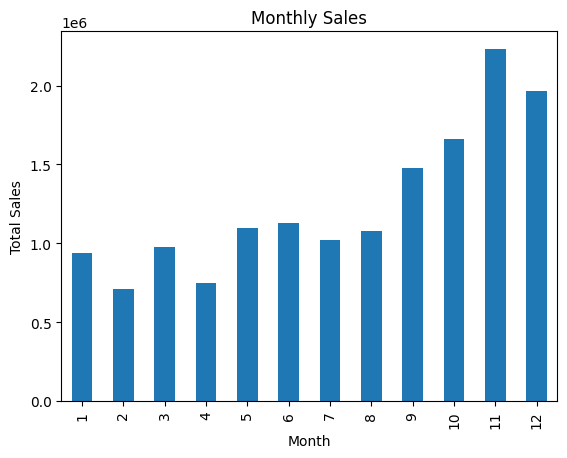

In [ ]:
monthly_sales.plot(kind="bar",title="Monthly Sales", xlabel = "Month", ylabel="Total Sales")


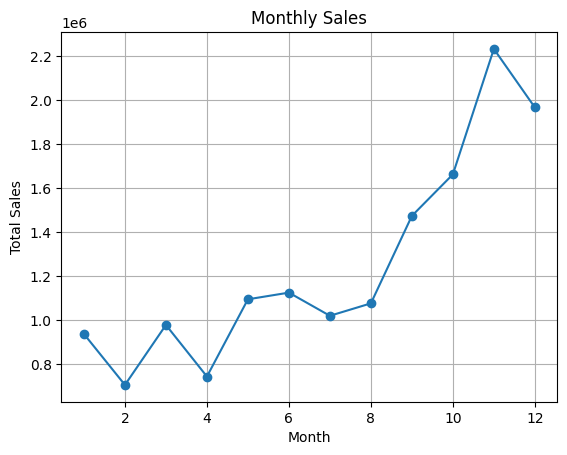

In [ ]:
monthly_sales.plot(kind="line",title="Monthly Sales", marker="o")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid()
plt.show()


Insights: Sales started rising in August and peaks in November. This might be because of the holiday season at the end of the year.

2) Top 5 Countries by Sales

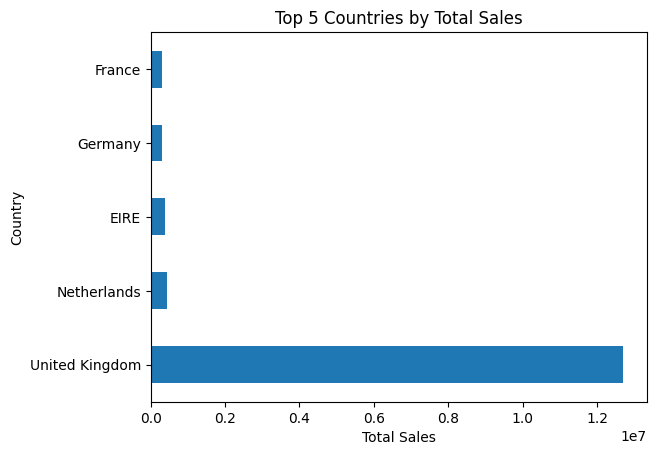

In [ ]:
country_sales = df4.groupby("Country")["TotalSales"].sum().sort_values(ascending=False)
top_5_countries = country_sales.head(5)
top_5_countries.plot(kind="barh", title="Top 5 Countries by Total Sales", xlabel="Total Sales", ylabel="Country")
plt.show()

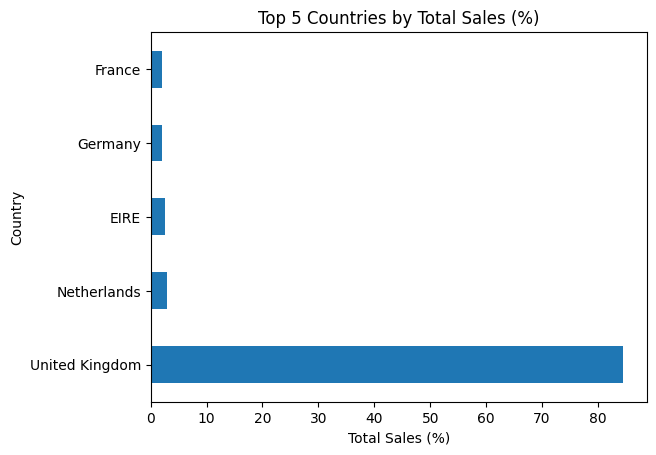

In [ ]:
country_sales = df4.groupby("Country")["TotalSales"].sum().sort_values(ascending=False)
total_sales_all_countries = country_sales.sum()
top_5_countries = country_sales.head(5)
top_5_countries_percentage = (top_5_countries / total_sales_all_countries) * 100

top_5_countries_percentage.plot(kind="barh", title="Top 5 Countries by Total Sales (%)", xlabel="Total Sales (%)", ylabel="Country")
plt.show()

RFM Analysis


In [ ]:
current_date = df4["InvoiceDate"].max() + pd.Timedelta(days=1)
current_date

Timestamp('2011-12-10 12:50:00')

In [ ]:
rfm = df4.groupby("CustomerID").agg({
    'InvoiceDate': lambda x: (current_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSales': 'sum'
})
rfm.columns = ["Recency", "Frequency", "Monetary"]
rfm.head(5)

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,227,5971.21
12348.0,75,34,1930.44
12349.0,19,92,2165.86
12350.0,310,19,364.40


In [ ]:
df4[df4.CustomerID==12347]["TotalSales"].sum()

np.float64(5971.210000000001)

In [ ]:
rfm.describe()

,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000
mean,92.536422,121.568695,2913.431619
std,100.014169,294.353579,12768.290416
min,1.000000,1.000000,6.200000
25%,18.000000,23.000000,408.650000
50%,51.000000,54.000000,922.130000
75%,142.000000,133.000000,2301.962500
max,374.000000,9792.000000,425037.470000


In [ ]:
rfm['R_Segment'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])
rfm['F_Segment'] = pd.qcut(rfm['Frequency'], 4, labels=[1, 2, 3, 4])
rfm['M_Segment'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])
rfm['RFM_Score'] = rfm[['R_Segment', 'F_Segment', 'M_Segment']].sum(axis=1)
rfm

,Recency,Frequency,Monetary,R_Segment,F_Segment,M_Segment,RFM_Score
CustomerID,,,,,,,
12346.0,326,1,77183.60,1,1,4,6
12347.0,2,227,5971.21,4,4,4,12
12348.0,75,34,1930.44,2,2,3,7
12349.0,19,92,2165.86,3,3,3,9
12350.0,310,19,364.40,1,1,1,3
...,...,...,...,...,...,...,...
18280.0,278,12,211.20,1,1,1,3
18281.0,181,12,160.92,1,1,1,3
18282.0,8,17,269.97,4,1,1,6


In [ ]:
rfm.sort_values("RFM_Score", ascending=False)

,Recency,Frequency,Monetary,R_Segment,F_Segment,M_Segment,RFM_Score
CustomerID,,,,,,,
18283.0,4,987,3058.74,4,4,4,12
18245.0,7,225,3458.84,4,4,4,12
18241.0,10,152,3138.61,4,4,4,12
18230.0,9,135,5213.50,4,4,4,12
18229.0,12,223,10957.20,4,4,4,12
...,...,...,...,...,...,...,...
15236.0,299,21,393.05,1,1,1,3
15234.0,277,21,287.42,1,1,1,3
15226.0,311,10,185.01,1,1,1,3


Customer Churn Analysis


In [ ]:
customer_last_purchase = df4.groupby("CustomerID")["InvoiceDate"].max()
customer_last_purchase

,InvoiceDate
CustomerID,
12346.0,2011-01-18 10:01:00
12347.0,2011-12-07 15:52:00
12348.0,2011-09-25 13:13:00
12349.0,2011-11-21 09:51:00
12350.0,2011-02-02 16:01:00
...,...
18280.0,2011-03-07 09:52:00
18281.0,2011-06-12 10:53:00
18282.0,2011-12-02 11:43:00


In [ ]:
current_date

Timestamp('2011-12-10 12:50:00')

In [ ]:
customer_last_purchase = (current_date- customer_last_purchase).dt.days
customer_last_purchase.head(5)

,InvoiceDate
CustomerID,
12346.0,326
12347.0,2
12348.0,75
12349.0,19
12350.0,310


In [ ]:
customer_last_purchase.sort_values()

,InvoiceDate
CustomerID,
17364.0,1
12433.0,1
13599.0,1
13536.0,1
16933.0,1
...,...
17968.0,374
13747.0,374
17908.0,374


In [ ]:
churn_value = 90
churned_customers = customer_last_purchase[customer_last_purchase > churn_value]
churned_customers.head(5)

,InvoiceDate
CustomerID,
12346.0,326
12350.0,310
12353.0,204
12354.0,232
12355.0,214


Number of Churned Customers: 1449


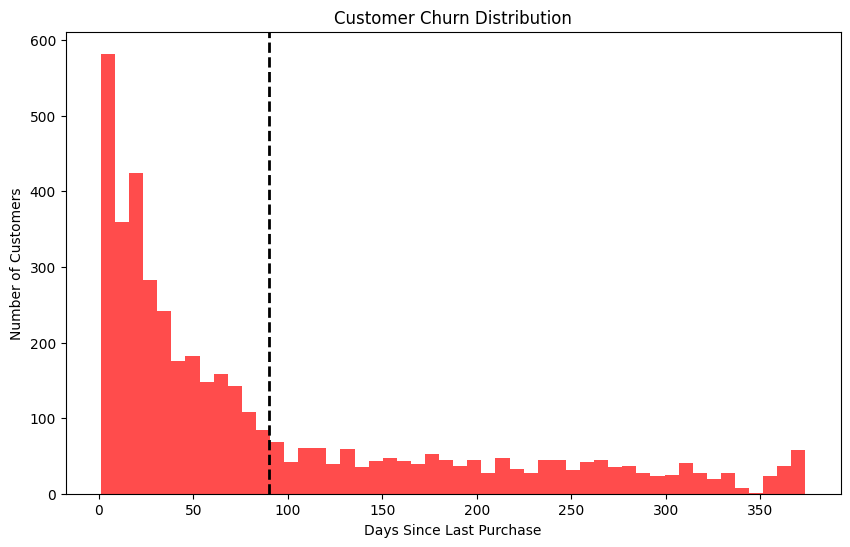

In [ ]:
print("Number of Churned Customers:", len(churned_customers))
plt.figure(figsize=(10, 6))
plt.hist(customer_last_purchase, bins=50, color='red', alpha=0.7)
plt.axvline(churn_value, color='black', linestyle='dashed', linewidth=2)
plt.title('Customer Churn Distribution')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Number of Customers')
plt.show()